# Classification Analysis of `ps_cluster` Target

## Overview

In this section, we will perform a classification analysis to understand how different features impact the `ps_cluster` target variable. We will explore a variety of classification algorithms that are known to be robust to outliers and assess their performance using metrics such as precision, recall, F1 score, and others from the classification report. These metrics are particularly useful to evaluate how well the models can correctly classify the target while handling outliers effectively.

## Key Objectives:
1. **Feature Selection:** Identify which features significantly contribute to predicting the `ps_cluster` variable.
2. **Model Selection:** We will use the following classification models that are robust to outliers:
   - **Decision Trees and Random Forests:** These models are naturally robust to outliers because splits are based on relative ordering rather than absolute values. Outliers only affect their own leaf nodes, and Random Forests, in particular, benefit from:
     - Bagging (Bootstrap Aggregating)
     - Random feature selection
     - Ensemble voting mechanism
   - **Support Vector Machines (SVM) with appropriate kernels:** Using the soft margin SVM allows for some misclassifications, and the RBF kernel can handle non-linear decision boundaries. We can further improve robustness by using:
     - L1 loss function
     - Huber loss function
     - ε-insensitive loss function
   - **Robust Logistic Regression variants:** These models can be adjusted for outliers using techniques like:
     - Huber regression
     - Least trimmed squares regression
     - M-estimators
     - L1 regularization (Lasso) to reduce the impact of outliers
   - **k-Nearest Neighbors (KNN) with modifications:** KNN can be made more robust by:
     - Using median instead of mean for voting
     - Distance-weighted voting
     - Local outlier factor (LOF) preprocessing
   - **Ensemble Methods:** These methods can enhance robustness through:
     - Bagging (Bootstrap Aggregating)
     - Boosting with robust base learners
     - Stacking with diverse models
3. **Model Evaluation:** Evaluate each model using classification metrics such as:
   - **Precision:** The proportion of positive predictions that were actually correct.
   - **Recall:** The proportion of actual positives that were correctly identified by the model.
   - **F1-Score:** The harmonic mean of precision and recall, balancing both metrics.
4. **Performance Tuning:** Fine-tune model hyperparameters and refine the feature set to optimize performance.

## Approach
We will start by training the models with the dataset filled with "unknown" values, then evaluate their performance based on the classification metrics. By the end of this analysis, we will gain insights into how different classification models handle the `ps_cluster` variable, particularly with respect to outlier robustness.

Let’s proceed with training, evaluation, and optimization of these robust models!


In [1]:
# Data handling and preprocessing
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder

# Classification algorithms (Robust to outliers)
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, BaggingClassifier, AdaBoostClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier

# Ensemble algorithms
from sklearn.ensemble import VotingClassifier
import xgboost as xgb
import catboost
from catboost import CatBoostClassifier
from sklearn.ensemble import HistGradientBoostingClassifier

# Model evaluation and metrics
from sklearn.metrics import classification_report, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.model_selection import cross_val_score

# Hyperparameter tuning and cross-validation
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.metrics import make_scorer

# Robust algorithms or variants (e.g., for logistic regression, KNN, etc.)
from sklearn.linear_model import HuberRegressor, RANSACRegressor, TheilSenRegressor
from sklearn.svm import SVR
from sklearn.neighbors import LocalOutlierFactor

# For dimensionality reduction (PCA)
from sklearn.decomposition import PCA

# Visualization libraries (for performance visualization)
import matplotlib.pyplot as plt
import seaborn as sns

# Model evaluation - cross-validation and grid search
from sklearn.model_selection import StratifiedKFold

# Imports for transformations and other utilities
from sklearn.preprocessing import QuantileTransformer, RobustScaler
import numpy as np
from scipy import stats
import pandas as pd
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt
from sklearn.ensemble import VotingClassifier
from sklearn.pipeline import Pipeline
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import QuantileTransformer, RobustScaler, StandardScaler
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier, GradientBoostingClassifier, AdaBoostClassifier, VotingClassifier, BaggingClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression, RidgeClassifier, Perceptron
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier
from sklearn.metrics import classification_report
import shap
import matplotlib.pyplot as plt
from scipy import stats
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler, RobustScaler, QuantileTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier, GradientBoostingClassifier, AdaBoostClassifier, VotingClassifier, BaggingClassifier
from sklearn.linear_model import LogisticRegression, RidgeClassifier, Perceptron
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier
import shap
from sklearn.metrics import classification_report


In [2]:
df = pd.read_csv('C:/Users/mayuo/OneDrive/Documents/Machine Learning by Abraham/interview_take_home/data/data_filled_unknown.csv')

df = df.drop(columns=['Unnamed: 0', 'ps_cluster_encoded'])
df.head(4)

,ps_cluster,market_segment,sub_type,ps_weekday_working_usage,ps_weekday_nonworking_usage,ps_weekend_usage,sv_job_collated,sv_skill_collated,sv_purpose_collated,ps_doc_average_file_size,...,tb_tot_no_activities,tb_activity_on_after_effects,tb_activity_on_bridge,tb_activity_on_illustrator,tb_activity_on_indesign,tb_activity_on_lightroom,tb_activity_on_media_encoder,tb_activity_on_photoshop,tb_activity_on_premiere_pro,tb_activity_on_adobe_xd
0,Photo Enthusiast,COMMERCIAL,Phtoshp Lightrm Bndl,0.621516,0.000000,0.378484,hobbyist,all_three_skill_levels,me_nonprofessional,14.000000,...,0.182320,0.0,0.033149,0.000000,0.000000,0.022099,0.0,0.127072,0.0,0.00000
1,Independent Photo Pro,COMMERCIAL,Phtoshp Lightrm Bndl,0.719328,0.014286,0.266387,unknown,unknown,unknown,82.800000,...,0.237569,0.0,0.000000,0.000000,0.000000,0.198895,0.0,0.038674,0.0,0.00000
2,Independent Photo Pro,COMMERCIAL,Creative Cloud,0.999827,0.000056,0.000117,printgraphicdesign,experienced,org_involved,49.728155,...,4.381215,0.0,0.160221,1.430939,0.022099,0.000000,0.0,1.740331,0.0,1.01105
3,Interactive Designer,COMMERCIAL,Photoshop,1.000000,0.000000,0.000000,unknown,unknown,unknown,0.000000,...,0.016575,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.016575,0.0,0.00000


In [3]:
# Outlier handling function
def handle_outliers(df, method='robust'):
    """
    Handle outliers in the dataframe using different methods.
    Options: 'robust', 'quantile', 'log', 'none'
    """
    if method == 'robust':
        scaler = RobustScaler()
        df_scaled = pd.DataFrame(scaler.fit_transform(df), columns=df.columns)
    elif method == 'quantile':
        scaler = QuantileTransformer(output_distribution='normal')
        df_scaled = pd.DataFrame(scaler.fit_transform(df), columns=df.columns)
    elif method == 'log':
        df_scaled = df.apply(lambda x: np.log1p(x) if x.min() > 0 else x)  # log1p avoids issues with zeros
    else:
        df_scaled = df.copy()  # No transformation
    return df_scaled

In [4]:
def preprocess_data(df, target_column, columns_to_encode=None, outlier_method='none', apply_scaling=True, scaling_method="standard"):
    """
    Preprocess data for model training, applying encoding, outlier handling, and scaling if specified.
    Returns preprocessed features, target, and a scaler if scaling was applied.
    """
    try:
        # Separate target and features
        if target_column not in df.columns:
            raise KeyError(f"Target column '{target_column}' not found in DataFrame!")

        y = LabelEncoder().fit_transform(df[target_column])
        X = df.drop(columns=[target_column])

    except KeyError as e:
        print(f"Error: {e}")
        return None, None, None, None
    except Exception as e:
        print(f"Unexpected error during target-column separation: {e}")
        return None, None, None, None

    try:
        # Handle missing values
        # For numerical columns, fill missing values with the mean
        numerical_cols = X.select_dtypes(include=['float64']).columns
        imputer = SimpleImputer(strategy='mean')
        X[numerical_cols] = imputer.fit_transform(X[numerical_cols])

        # For categorical columns, fill missing values with 'missing'
        categorical_cols = X.select_dtypes(include=['object']).columns
        X[categorical_cols] = X[categorical_cols].fillna('missing')
        
    except Exception as e:
        print(f"Error during missing value handling: {e}")
        return None, None, None, None

    try:
        # Encode categorical features
        if columns_to_encode:
            for col in columns_to_encode:
                if col in X.columns and X[col].dtype == 'object':
                    X[col] = LabelEncoder().fit_transform(X[col])

    except KeyError as e:
        print(f"Error: Column '{e.args[0]}' not found for encoding!")
        return None, None, None, None
    except Exception as e:
        print(f"Unexpected error during encoding: {e}")
        return None, None, None, None

    try:
        # Handle outliers if specified
        X = handle_outliers(X, method=outlier_method)
    
    except Exception as e:
        print(f"Error during outlier handling: {e}")
        return None, None, None, None

    try:
        # Scaling
        scaler = None
        if apply_scaling:
            if scaling_method == "standard":
                scaler = StandardScaler()
            elif scaling_method == "robust":
                scaler = RobustScaler()
            else:
                raise ValueError(f"Scaling method '{scaling_method}' is not supported.")
            X_scaled = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)
            return X_scaled, y, scaler, X  # Return original X for SHAP
        else:
            return X, y, None, X  # Return original X for SHAP

    except ValueError as e:
        print(f"Error: {e}")
        return None, None, None, None
    except Exception as e:
        print(f"Unexpected error during scaling: {e}")
        return None, None, None, None


In [5]:
import time
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

def train_and_evaluate_models(X_train, y_train, X_test, y_test, encoder):
    """
    Train and evaluate various classification models, print classification reports, 
    confusion matrices, and training times.
    """
    # Get the class names from the encoder
    class_names = [str(name) for name in encoder.classes_]
    
    models = {
        # Tree-based models
        "Random Forest": RandomForestClassifier(),
        "Extra Trees": ExtraTreesClassifier(),
        "Gradient Boosting": GradientBoostingClassifier(),
        "XGBoost": XGBClassifier(),
        "LightGBM": LGBMClassifier(),
        "CatBoost": CatBoostClassifier(verbose=0),
        
        # Linear models
        "Logistic Regression": LogisticRegression(),
        "Ridge Classifier": RidgeClassifier(),
        "Perceptron": Perceptron(),
        
        # Nearest Neighbors
        "K-Nearest Neighbors": KNeighborsClassifier(),
        
        # # Support Vector Machines
        # "Support Vector Machine (Linear)": SVC(kernel='linear'),
        # "Support Vector Machine (RBF)": SVC(kernel='rbf'),
        
        # Ensemble methods
        "Voting Classifier": VotingClassifier(
            estimators=[
                ('rf', RandomForestClassifier()),
                ('xgb', XGBClassifier())
            ],
            voting='soft'
        ),
        # Corrected line: replace 'base_estimator' with 'estimator'
        "Bagging Classifier": BaggingClassifier(estimator=RandomForestClassifier(), n_estimators=10),
        "AdaBoost": AdaBoostClassifier(estimator=DecisionTreeClassifier(max_depth=1)),  # Fixed line
        "Gradient Boosting (Robust)": GradientBoostingClassifier(loss='lad'),

    }
    
    for model_name, model in models.items():
        print(f"\nTraining {model_name}...")
        
        start_time = time.time()  # Start time for training
        model.fit(X_train, y_train)
        end_time = time.time()  # End time for training
        
        training_time = end_time - start_time
        print(f"Training time for {model_name}: {training_time:.2f} seconds")
        
        # Predictions on both train and test sets
        y_train_pred = model.predict(X_train)
        y_test_pred = model.predict(X_test)
        
        print(f"\nClassification Report for {model_name} (Train Set):")
        print(classification_report(y_train, y_train_pred, target_names=class_names))
        
        print(f"\nClassification Report for {model_name} (Test Set):")
        print(classification_report(y_test, y_test_pred, target_names=class_names))
        
        # Confusion Matrix for Train Set
        print(f"Confusion Matrix for {model_name} (Train Set):")
        cm_train = confusion_matrix(y_train, y_train_pred)
        sns.heatmap(cm_train, annot=True, fmt="d", cmap="Blues", xticklabels=class_names, yticklabels=class_names)
        plt.title(f"Confusion Matrix (Train) - {model_name}")
        plt.xlabel('Predicted')
        plt.ylabel('True')
        plt.show()
        
        # Confusion Matrix for Test Set
        print(f"Confusion Matrix for {model_name} (Test Set):")
        cm_test = confusion_matrix(y_test, y_test_pred)
        sns.heatmap(cm_test, annot=True, fmt="d", cmap="Blues", xticklabels=class_names, yticklabels=class_names)
        plt.title(f"Confusion Matrix (Test) - {model_name}")
        plt.xlabel('Predicted')
        plt.ylabel('True')
        plt.show()

In [6]:
def shap_analysis(model, X_train, original_X, scaler=None):
    """
    Perform SHAP analysis using the original untransformed data.
    """
    # Use original X values (unscaled) for SHAP if scaling was applied
    X_unscaled = pd.DataFrame(scaler.inverse_transform(X_train), columns=original_X.columns) if scaler else original_X
    
    # SHAP analysis
    explainer = shap.Explainer(model, X_unscaled)
    shap_values = explainer(X_unscaled)
    
    # Summary plot for SHAP values
    shap.summary_plot(shap_values, X_unscaled)
    
    # Dependence plot for an example feature (modify as needed)
    shap.dependence_plot(0, shap_values, X_unscaled)

In [7]:
for col in ['machine_ps_max_memory', 'machine_ps_max_speed', 'machine_ps_max_monitorcount', 'machine_ps_max_numprocessors']:
    df[col] = pd.to_numeric(df[col], errors='coerce')

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11447 entries, 0 to 11446
Data columns (total 59 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   ps_cluster                       11447 non-null  object 
 1   market_segment                   11447 non-null  object 
 2   sub_type                         11447 non-null  object 
 3   ps_weekday_working_usage         11447 non-null  float64
 4   ps_weekday_nonworking_usage      11447 non-null  float64
 5   ps_weekend_usage                 11447 non-null  float64
 6   sv_job_collated                  11447 non-null  object 
 7   sv_skill_collated                11447 non-null  object 
 8   sv_purpose_collated              11447 non-null  object 
 9   ps_doc_average_file_size         11447 non-null  float64
 10  ps_doc_average_bit_depth         11447 non-null  float64
 11  ps_doc_average_layers            11447 non-null  float64
 12  ps_doc_average_hei

In [8]:
columns_to_encode = df.select_dtypes(include=['object']).columns.tolist() 
target_column = 'ps_cluster'

In [9]:
X, y, scaler, original_X = preprocess_data(df, 
                                           target_column, 
                                           columns_to_encode,  
                                           apply_scaling=False)

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=67)

In [11]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((9157, 58), (2290, 58), (9157,), (2290,))

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=67)
encoder = LabelEncoder()
y_train_encoded = encoder.fit_transform(y_train)
y_test_encoded = encoder.transform(y_test)


Training Random Forest...
Training time for Random Forest: 6.00 seconds

Classification Report for Random Forest (Train Set):
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1412
           1       1.00      1.00      1.00      1203
           2       1.00      1.00      1.00      2148
           3       1.00      1.00      1.00      2662
           4       1.00      1.00      1.00      1732

    accuracy                           1.00      9157
   macro avg       1.00      1.00      1.00      9157
weighted avg       1.00      1.00      1.00      9157


Classification Report for Random Forest (Test Set):
              precision    recall  f1-score   support

           0       0.57      0.25      0.34       374
           1       0.49      0.43      0.46       287
           2       0.48      0.55      0.51       552
           3       0.55      0.67      0.61       647
           4       0.57      0.61      0.59       430

    a

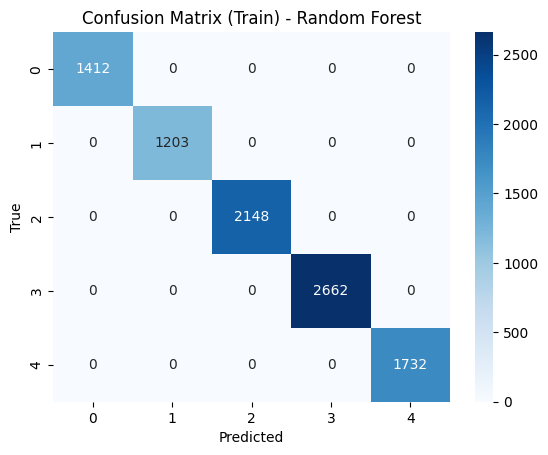

Confusion Matrix for Random Forest (Test Set):


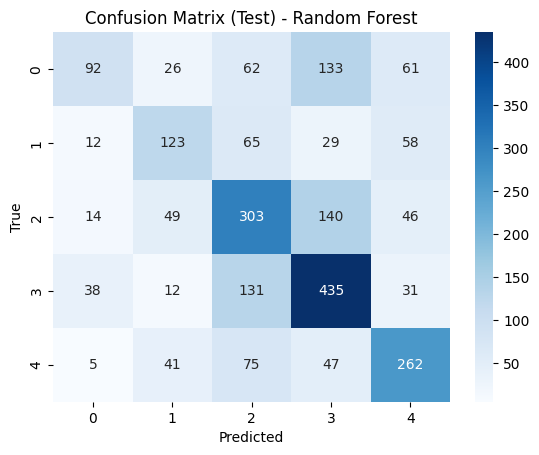


Training Extra Trees...
Training time for Extra Trees: 2.47 seconds

Classification Report for Extra Trees (Train Set):
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1412
           1       1.00      1.00      1.00      1203
           2       1.00      1.00      1.00      2148
           3       1.00      1.00      1.00      2662
           4       1.00      1.00      1.00      1732

    accuracy                           1.00      9157
   macro avg       1.00      1.00      1.00      9157
weighted avg       1.00      1.00      1.00      9157


Classification Report for Extra Trees (Test Set):
              precision    recall  f1-score   support

           0       0.57      0.21      0.31       374
           1       0.51      0.41      0.46       287
           2       0.49      0.52      0.50       552
           3       0.54      0.70      0.61       647
           4       0.58      0.67      0.62       430

    accuracy 

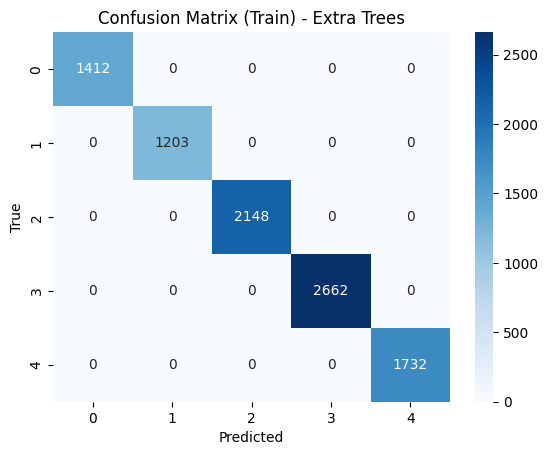

Confusion Matrix for Extra Trees (Test Set):


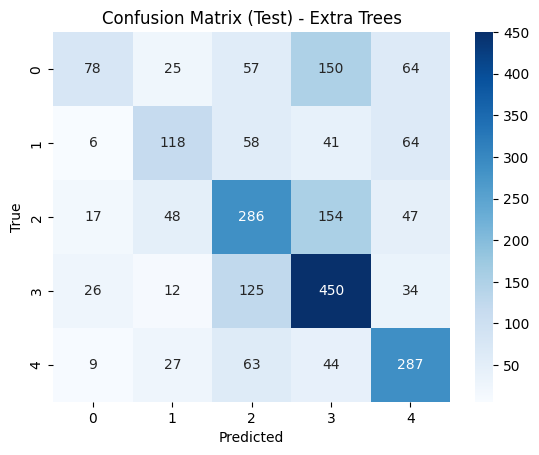


Training Gradient Boosting...
Training time for Gradient Boosting: 53.66 seconds

Classification Report for Gradient Boosting (Train Set):
              precision    recall  f1-score   support

           0       0.75      0.46      0.57      1412
           1       0.68      0.58      0.62      1203
           2       0.57      0.65      0.60      2148
           3       0.66      0.74      0.70      2662
           4       0.66      0.69      0.67      1732

    accuracy                           0.64      9157
   macro avg       0.66      0.62      0.63      9157
weighted avg       0.65      0.64      0.64      9157


Classification Report for Gradient Boosting (Test Set):
              precision    recall  f1-score   support

           0       0.57      0.32      0.41       374
           1       0.48      0.46      0.47       287
           2       0.51      0.55      0.53       552
           3       0.59      0.68      0.63       647
           4       0.61      0.64      0.63

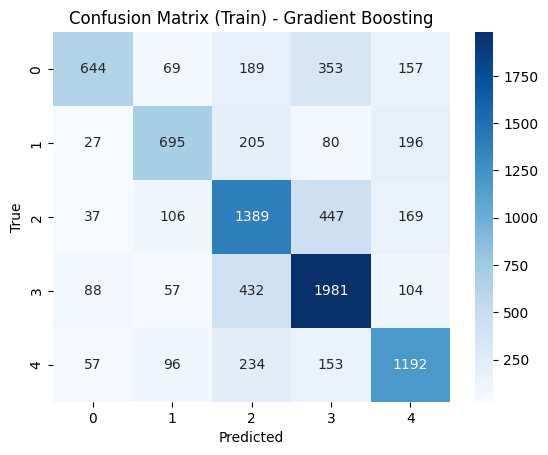

Confusion Matrix for Gradient Boosting (Test Set):


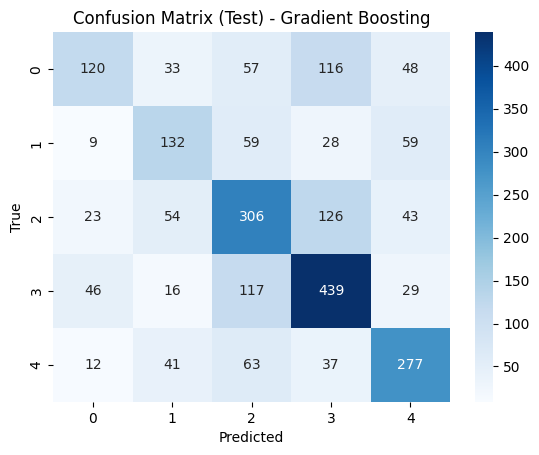


Training XGBoost...
Training time for XGBoost: 12.86 seconds

Classification Report for XGBoost (Train Set):
              precision    recall  f1-score   support

           0       1.00      0.98      0.99      1412
           1       1.00      1.00      1.00      1203
           2       0.98      0.98      0.98      2148
           3       0.98      0.99      0.98      2662
           4       0.99      0.99      0.99      1732

    accuracy                           0.99      9157
   macro avg       0.99      0.99      0.99      9157
weighted avg       0.99      0.99      0.99      9157


Classification Report for XGBoost (Test Set):
              precision    recall  f1-score   support

           0       0.48      0.29      0.36       374
           1       0.48      0.43      0.45       287
           2       0.50      0.53      0.51       552
           3       0.55      0.65      0.60       647
           4       0.56      0.61      0.58       430

    accuracy                

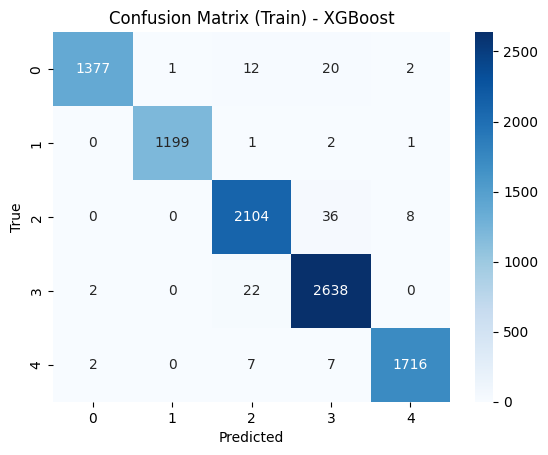

Confusion Matrix for XGBoost (Test Set):


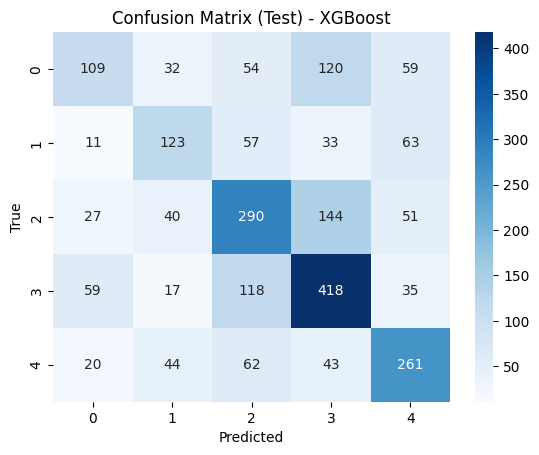


Training LightGBM...
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002060 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 10976
[LightGBM] [Info] Number of data points in the train set: 9157, number of used features: 58
[LightGBM] [Info] Start training from score -1.869511
[LightGBM] [Info] Start training from score -2.029700
[LightGBM] [Info] Start training from score -1.449981
[LightGBM] [Info] Start training from score -1.235441
[LightGBM] [Info] Start training from score -1.665242
Training time for LightGBM: 3.42 seconds

Classification Report for LightGBM (Train Set):
              precision    recall  f1-score   support

           0       0.97      0.86      0.91      1412
           1       0.97      0.94      0.95      1203
           2       0.89      0.92      0.91      2148
           3       0.91      0.95      0.93     

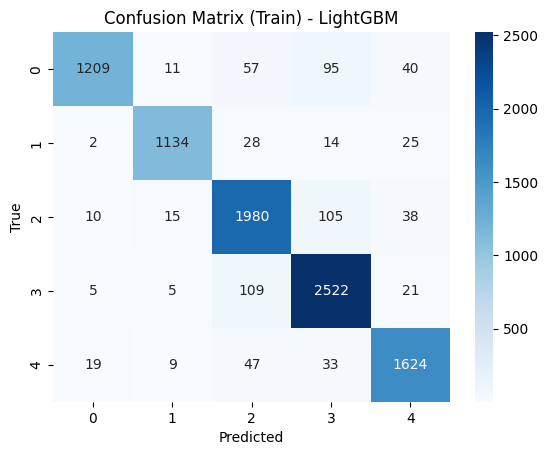

Confusion Matrix for LightGBM (Test Set):


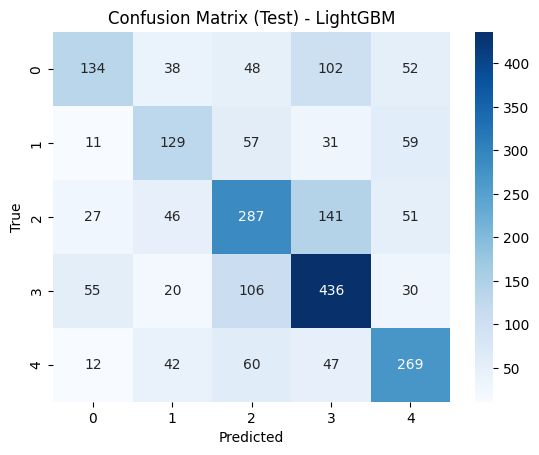


Training CatBoost...
Training time for CatBoost: 51.86 seconds

Classification Report for CatBoost (Train Set):
              precision    recall  f1-score   support

           0       0.94      0.79      0.86      1412
           1       0.93      0.89      0.91      1203
           2       0.89      0.89      0.89      2148
           3       0.87      0.94      0.90      2662
           4       0.88      0.92      0.90      1732

    accuracy                           0.89      9157
   macro avg       0.90      0.88      0.89      9157
weighted avg       0.90      0.89      0.89      9157


Classification Report for CatBoost (Test Set):
              precision    recall  f1-score   support

           0       0.56      0.34      0.43       374
           1       0.49      0.46      0.47       287
           2       0.51      0.53      0.52       552
           3       0.57      0.65      0.61       647
           4       0.59      0.63      0.61       430

    accuracy            

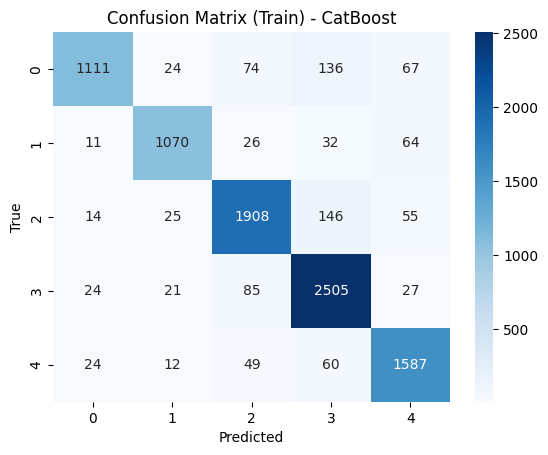

Confusion Matrix for CatBoost (Test Set):


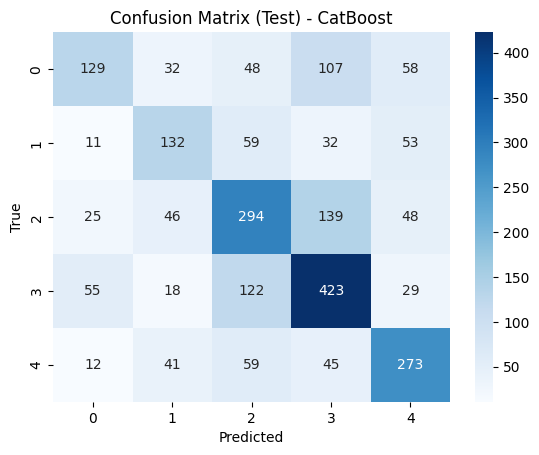


Training Logistic Regression...


c:\Users\mayuo\OneDrive\Documents\Machine Learning by Abraham\interview_take_home\venv\lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\Users\mayuo\OneDrive\Documents\Machine Learning by Abraham\interview_take_home\venv\lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\mayuo\OneDrive\Documents\Machine 

Training time for Logistic Regression: 0.62 seconds

Classification Report for Logistic Regression (Train Set):
              precision    recall  f1-score   support

           0       1.00      0.00      0.00      1412
           1       0.00      0.00      0.00      1203
           2       0.24      0.16      0.19      2148
           3       0.31      0.88      0.45      2662
           4       0.00      0.00      0.00      1732

    accuracy                           0.29      9157
   macro avg       0.31      0.21      0.13      9157
weighted avg       0.30      0.29      0.18      9157


Classification Report for Logistic Regression (Test Set):
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       374
           1       0.00      0.00      0.00       287
           2       0.28      0.19      0.22       552
           3       0.30      0.88      0.44       647
           4       0.00      0.00      0.00       430

    accuracy  

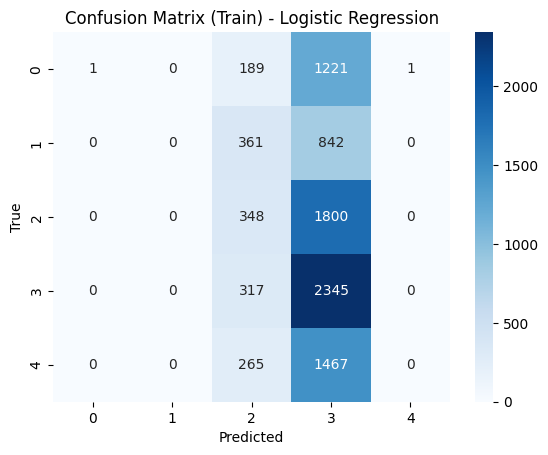

Confusion Matrix for Logistic Regression (Test Set):


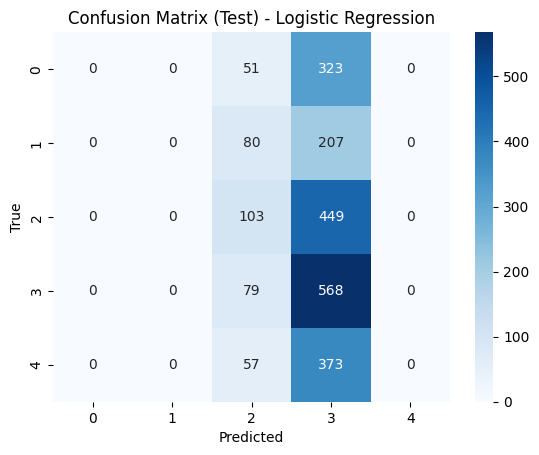


Training Ridge Classifier...
Training time for Ridge Classifier: 0.02 seconds

Classification Report for Ridge Classifier (Train Set):
              precision    recall  f1-score   support

           0       0.61      0.14      0.23      1412
           1       0.57      0.36      0.44      1203
           2       0.44      0.42      0.43      2148
           3       0.49      0.78      0.60      2662
           4       0.55      0.58      0.57      1732

    accuracy                           0.50      9157
   macro avg       0.53      0.46      0.45      9157
weighted avg       0.52      0.50      0.48      9157


Classification Report for Ridge Classifier (Test Set):
              precision    recall  f1-score   support

           0       0.59      0.10      0.18       374
           1       0.54      0.36      0.43       287
           2       0.45      0.43      0.44       552
           3       0.49      0.77      0.60       647
           4       0.57      0.64      0.60     

c:\Users\mayuo\OneDrive\Documents\Machine Learning by Abraham\interview_take_home\venv\lib\site-packages\sklearn\linear_model\_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=1.58217e-23): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T


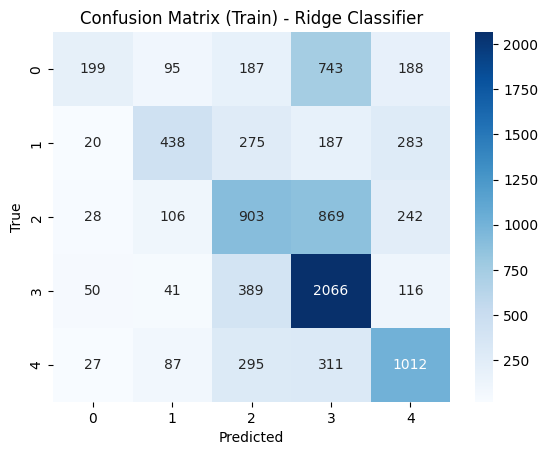

Confusion Matrix for Ridge Classifier (Test Set):


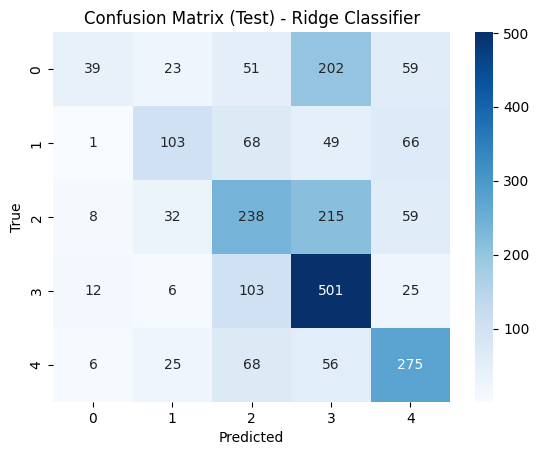


Training Perceptron...
Training time for Perceptron: 0.22 seconds

Classification Report for Perceptron (Train Set):
              precision    recall  f1-score   support

           0       0.15      0.01      0.01      1412
           1       0.25      0.07      0.11      1203
           2       0.27      0.21      0.24      2148
           3       0.33      0.76      0.46      2662
           4       0.26      0.16      0.20      1732

    accuracy                           0.31      9157
   macro avg       0.25      0.24      0.20      9157
weighted avg       0.27      0.31      0.24      9157


Classification Report for Perceptron (Test Set):
              precision    recall  f1-score   support

           0       0.12      0.01      0.01       374
           1       0.16      0.05      0.07       287
           2       0.27      0.19      0.23       552
           3       0.31      0.73      0.44       647
           4       0.23      0.15      0.18       430

    accuracy     

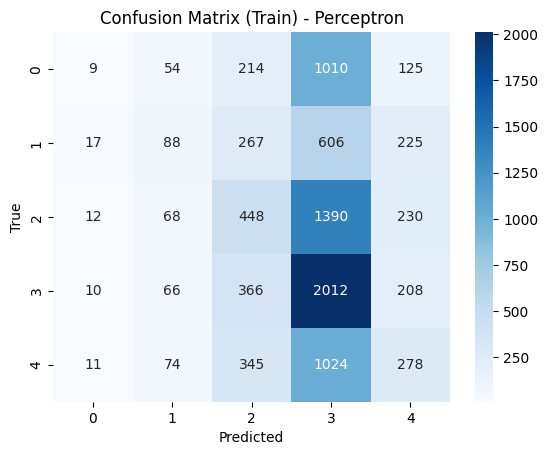

Confusion Matrix for Perceptron (Test Set):


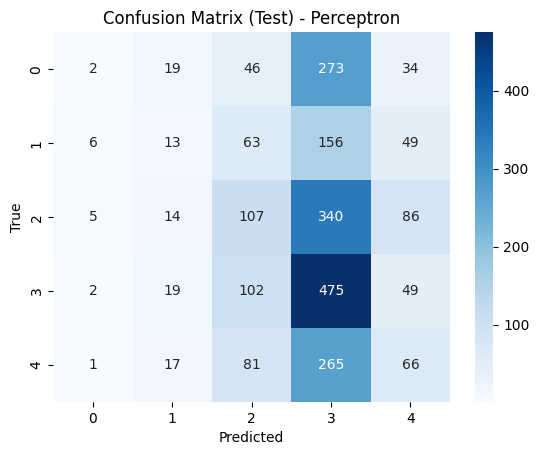


Training K-Nearest Neighbors...
Training time for K-Nearest Neighbors: 0.02 seconds

Classification Report for K-Nearest Neighbors (Train Set):
              precision    recall  f1-score   support

           0       0.47      0.54      0.50      1412
           1       0.50      0.51      0.50      1203
           2       0.55      0.63      0.58      2148
           3       0.57      0.58      0.57      2662
           4       0.56      0.38      0.45      1732

    accuracy                           0.53      9157
   macro avg       0.53      0.52      0.52      9157
weighted avg       0.54      0.53      0.53      9157


Classification Report for K-Nearest Neighbors (Test Set):
              precision    recall  f1-score   support

           0       0.26      0.29      0.27       374
           1       0.20      0.21      0.21       287
           2       0.35      0.38      0.36       552
           3       0.33      0.35      0.34       647
           4       0.30      0.20   

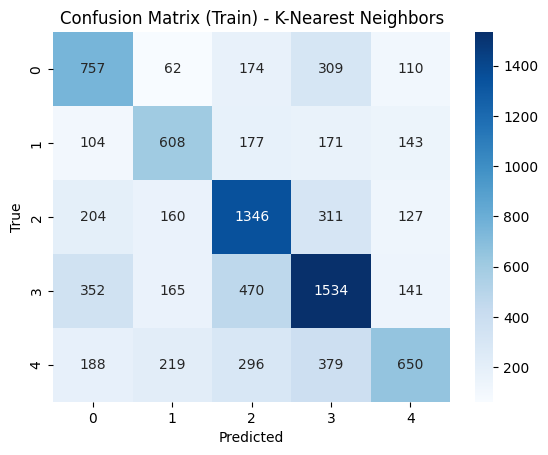

Confusion Matrix for K-Nearest Neighbors (Test Set):


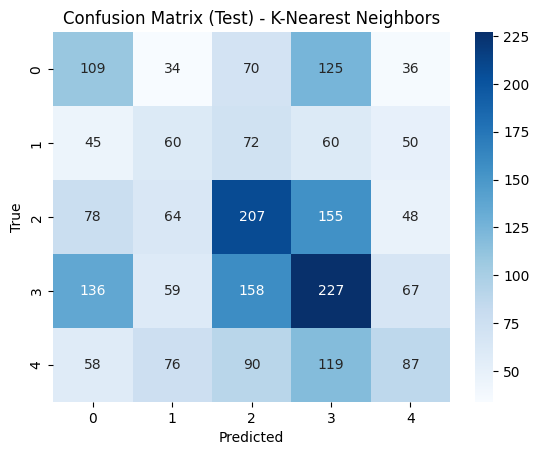


Training Voting Classifier...
Training time for Voting Classifier: 22.86 seconds

Classification Report for Voting Classifier (Train Set):
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1412
           1       1.00      1.00      1.00      1203
           2       1.00      1.00      1.00      2148
           3       1.00      1.00      1.00      2662
           4       1.00      1.00      1.00      1732

    accuracy                           1.00      9157
   macro avg       1.00      1.00      1.00      9157
weighted avg       1.00      1.00      1.00      9157


Classification Report for Voting Classifier (Test Set):
              precision    recall  f1-score   support

           0       0.54      0.28      0.37       374
           1       0.49      0.41      0.45       287
           2       0.50      0.55      0.52       552
           3       0.56      0.67      0.61       647
           4       0.56      0.63      0.59

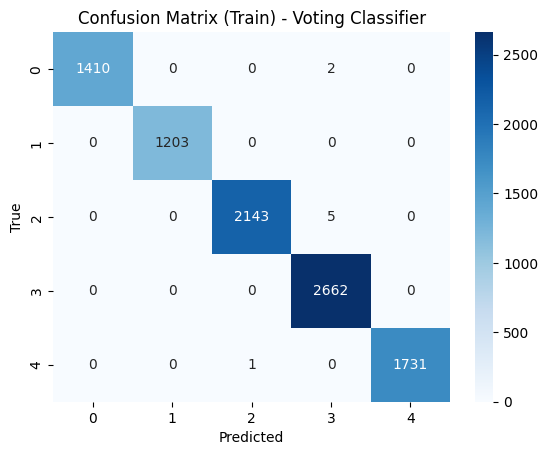

Confusion Matrix for Voting Classifier (Test Set):


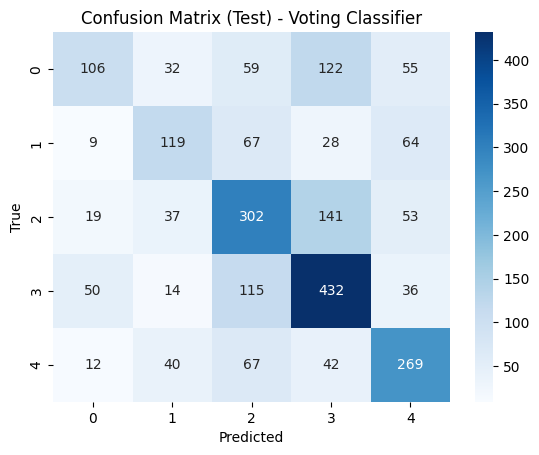


Training Bagging Classifier...
Training time for Bagging Classifier: 31.41 seconds

Classification Report for Bagging Classifier (Train Set):
              precision    recall  f1-score   support

           0       1.00      0.96      0.98      1412
           1       0.99      0.96      0.97      1203
           2       0.98      0.98      0.98      2148
           3       0.97      0.99      0.98      2662
           4       0.96      0.98      0.97      1732

    accuracy                           0.98      9157
   macro avg       0.98      0.97      0.98      9157
weighted avg       0.98      0.98      0.98      9157


Classification Report for Bagging Classifier (Test Set):
              precision    recall  f1-score   support

           0       0.63      0.23      0.34       374
           1       0.52      0.40      0.45       287
           2       0.48      0.57      0.52       552
           3       0.55      0.68      0.61       647
           4       0.56      0.64      

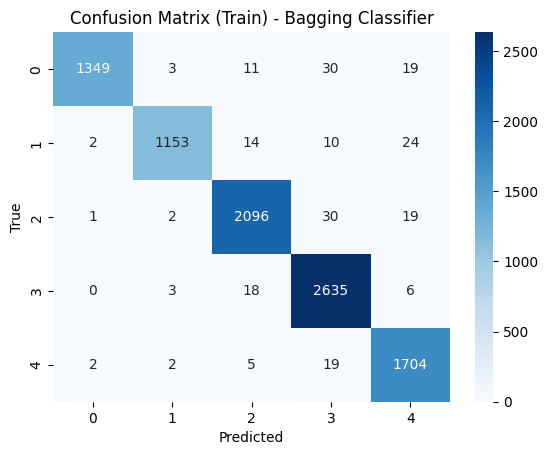

Confusion Matrix for Bagging Classifier (Test Set):


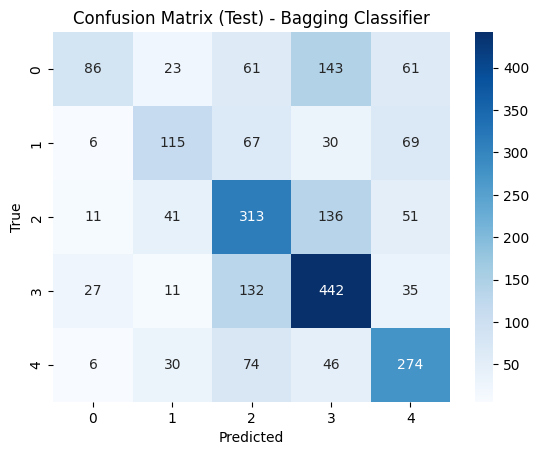


Training AdaBoost...


c:\Users\mayuo\OneDrive\Documents\Machine Learning by Abraham\interview_take_home\venv\lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


Training time for AdaBoost: 2.15 seconds

Classification Report for AdaBoost (Train Set):
              precision    recall  f1-score   support

           0       0.50      0.29      0.37      1412
           1       0.47      0.46      0.47      1203
           2       0.47      0.44      0.45      2148
           3       0.54      0.67      0.60      2662
           4       0.55      0.60      0.57      1732

    accuracy                           0.52      9157
   macro avg       0.51      0.49      0.49      9157
weighted avg       0.51      0.52      0.51      9157


Classification Report for AdaBoost (Test Set):
              precision    recall  f1-score   support

           0       0.54      0.28      0.37       374
           1       0.42      0.44      0.43       287
           2       0.46      0.41      0.43       552
           3       0.55      0.70      0.61       647
           4       0.56      0.61      0.58       430

    accuracy                           0.51    

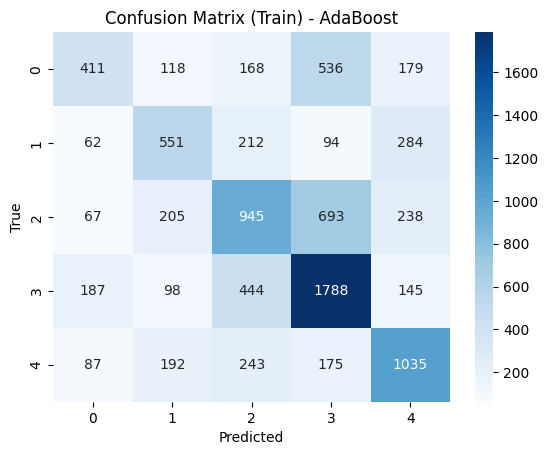

Confusion Matrix for AdaBoost (Test Set):


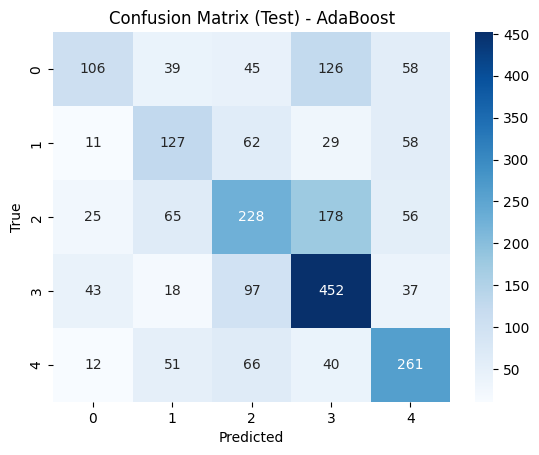


Training Gradient Boosting (Robust)...


InvalidParameterError: The 'loss' parameter of GradientBoostingClassifier must be a str among {'log_loss', 'exponential'}. Got 'lad' instead.

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=67)
encoder = LabelEncoder()
y_train_encoded = encoder.fit_transform(y_train)
y_test_encoded = encoder.transform(y_test)
train_and_evaluate_models(X_train, y_train_encoded, X_test, y_test_encoded, encoder)

In [27]:
X, y, scaler, original_X = preprocess_data(df, 
                                           target_column, 
                                           columns_to_encode,  
                                           apply_scaling=True,
                                           outlier_method= 'log'
                                           )


Training Random Forest...
Training time for Random Forest: 3.97 seconds

Classification Report for Random Forest (Train Set):
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1412
           1       1.00      1.00      1.00      1203
           2       1.00      1.00      1.00      2148
           3       1.00      1.00      1.00      2662
           4       1.00      1.00      1.00      1732

    accuracy                           1.00      9157
   macro avg       1.00      1.00      1.00      9157
weighted avg       1.00      1.00      1.00      9157


Classification Report for Random Forest (Test Set):
              precision    recall  f1-score   support

           0       0.60      0.26      0.37       374
           1       0.50      0.43      0.46       287
           2       0.49      0.56      0.52       552
           3       0.56      0.68      0.62       647
           4       0.59      0.63      0.61       430

    a

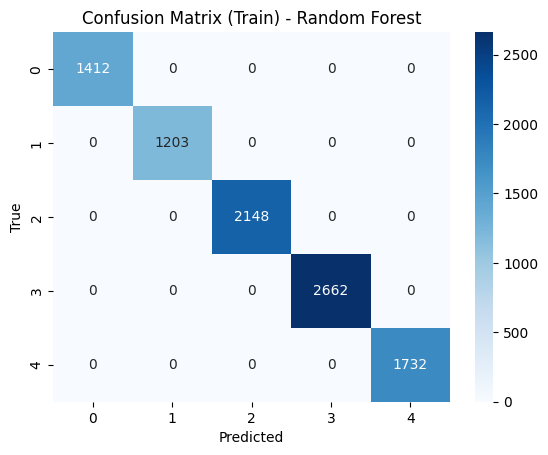

Confusion Matrix for Random Forest (Test Set):


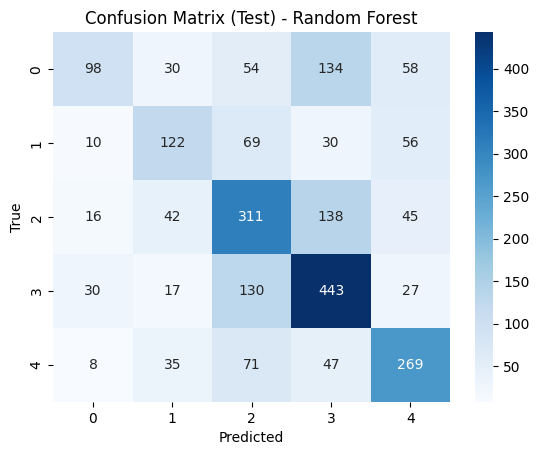


Training Extra Trees...
Training time for Extra Trees: 2.84 seconds

Classification Report for Extra Trees (Train Set):
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1412
           1       1.00      1.00      1.00      1203
           2       1.00      1.00      1.00      2148
           3       1.00      1.00      1.00      2662
           4       1.00      1.00      1.00      1732

    accuracy                           1.00      9157
   macro avg       1.00      1.00      1.00      9157
weighted avg       1.00      1.00      1.00      9157


Classification Report for Extra Trees (Test Set):
              precision    recall  f1-score   support

           0       0.56      0.20      0.30       374
           1       0.55      0.43      0.48       287
           2       0.48      0.53      0.50       552
           3       0.54      0.70      0.61       647
           4       0.56      0.64      0.60       430

    accuracy 

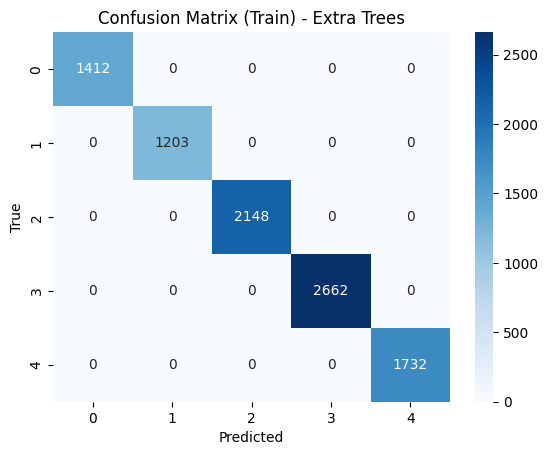

Confusion Matrix for Extra Trees (Test Set):


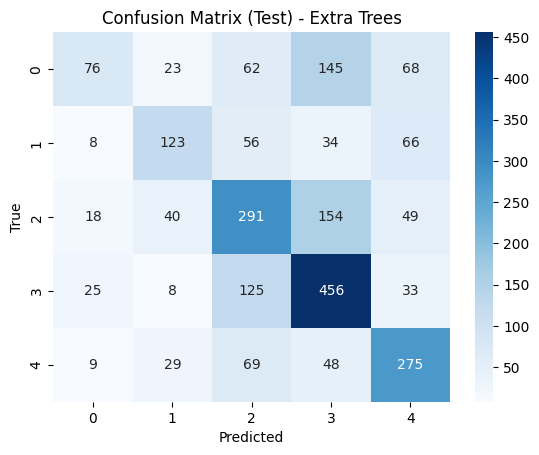


Training Gradient Boosting...
Training time for Gradient Boosting: 43.47 seconds

Classification Report for Gradient Boosting (Train Set):
              precision    recall  f1-score   support

           0       0.74      0.45      0.56      1412
           1       0.68      0.58      0.62      1203
           2       0.58      0.66      0.61      2148
           3       0.66      0.75      0.70      2662
           4       0.66      0.69      0.67      1732

    accuracy                           0.65      9157
   macro avg       0.66      0.62      0.64      9157
weighted avg       0.66      0.65      0.64      9157


Classification Report for Gradient Boosting (Test Set):
              precision    recall  f1-score   support

           0       0.57      0.33      0.42       374
           1       0.50      0.46      0.48       287
           2       0.51      0.55      0.53       552
           3       0.59      0.68      0.64       647
           4       0.61      0.65      0.63

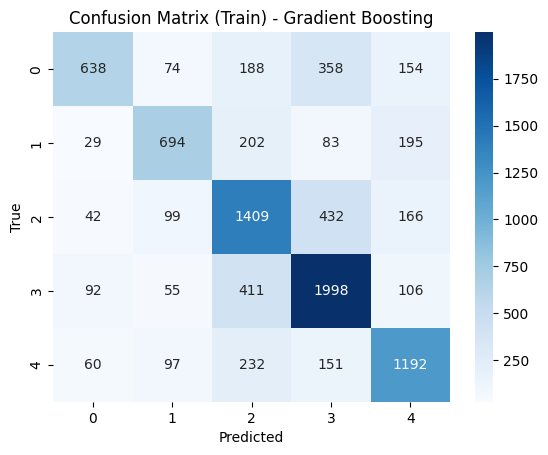

Confusion Matrix for Gradient Boosting (Test Set):


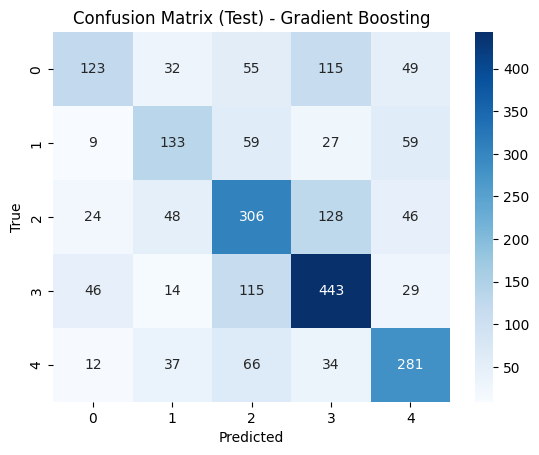


Training XGBoost...
Training time for XGBoost: 9.25 seconds

Classification Report for XGBoost (Train Set):
              precision    recall  f1-score   support

           0       1.00      0.98      0.99      1412
           1       1.00      1.00      1.00      1203
           2       0.98      0.98      0.98      2148
           3       0.97      0.99      0.98      2662
           4       1.00      0.99      0.99      1732

    accuracy                           0.99      9157
   macro avg       0.99      0.99      0.99      9157
weighted avg       0.99      0.99      0.99      9157


Classification Report for XGBoost (Test Set):
              precision    recall  f1-score   support

           0       0.50      0.32      0.39       374
           1       0.48      0.43      0.45       287
           2       0.51      0.53      0.52       552
           3       0.56      0.65      0.60       647
           4       0.57      0.63      0.60       430

    accuracy                 

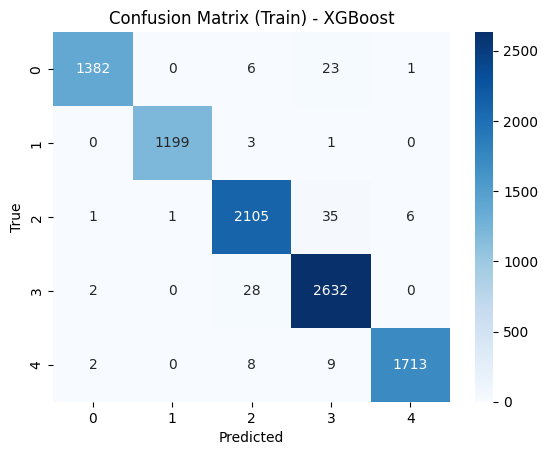

Confusion Matrix for XGBoost (Test Set):


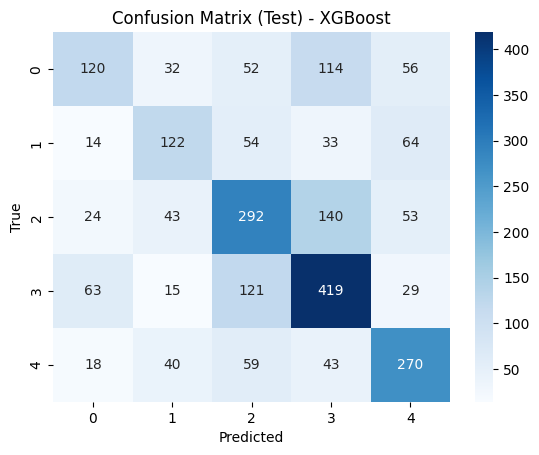


Training LightGBM...
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.005118 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 10757
[LightGBM] [Info] Number of data points in the train set: 9157, number of used features: 58
[LightGBM] [Info] Start training from score -1.869511
[LightGBM] [Info] Start training from score -2.029700
[LightGBM] [Info] Start training from score -1.449981
[LightGBM] [Info] Start training from score -1.235441
[LightGBM] [Info] Start training from score -1.665242
Training time for LightGBM: 2.21 seconds

Classification Report for LightGBM (Train Set):
              precision    recall  f1-score   support

           0       0.98      0.87      0.92      1412
           1       0.97      0.95      0.96      1203
           2       0.90      0.93      0.91      2148
           3       0.91      0.95      0.93      2662
           4       0.94      0.94      0.94      1732

   

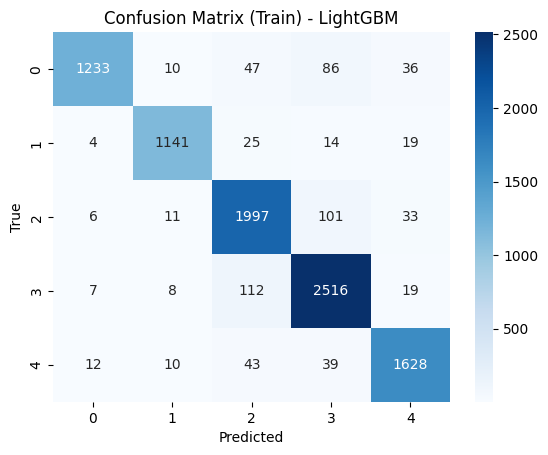

Confusion Matrix for LightGBM (Test Set):


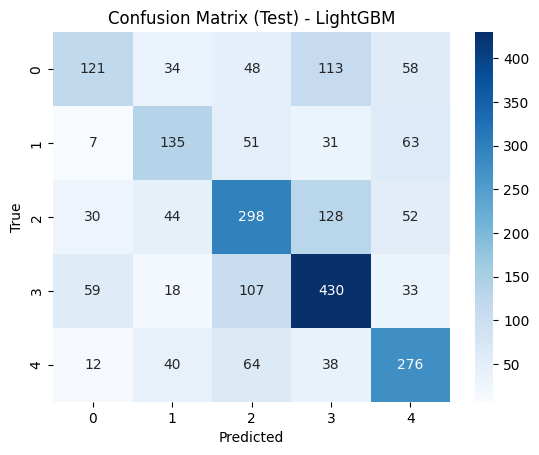


Training CatBoost...
Training time for CatBoost: 48.33 seconds

Classification Report for CatBoost (Train Set):
              precision    recall  f1-score   support

           0       0.94      0.78      0.86      1412
           1       0.92      0.89      0.91      1203
           2       0.88      0.89      0.89      2148
           3       0.87      0.94      0.90      2662
           4       0.88      0.90      0.89      1732

    accuracy                           0.89      9157
   macro avg       0.90      0.88      0.89      9157
weighted avg       0.89      0.89      0.89      9157


Classification Report for CatBoost (Test Set):
              precision    recall  f1-score   support

           0       0.56      0.34      0.42       374
           1       0.48      0.45      0.47       287
           2       0.52      0.54      0.53       552
           3       0.58      0.67      0.63       647
           4       0.59      0.64      0.61       430

    accuracy            

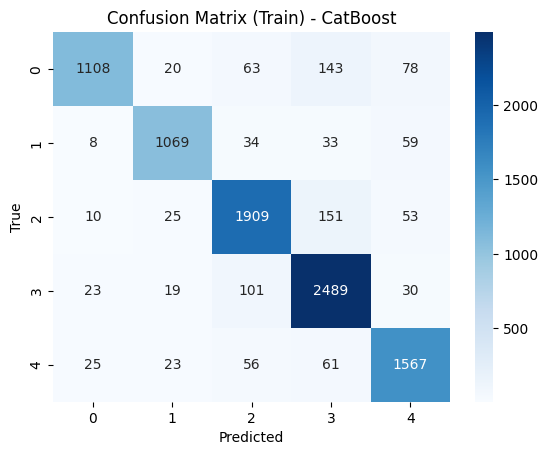

Confusion Matrix for CatBoost (Test Set):


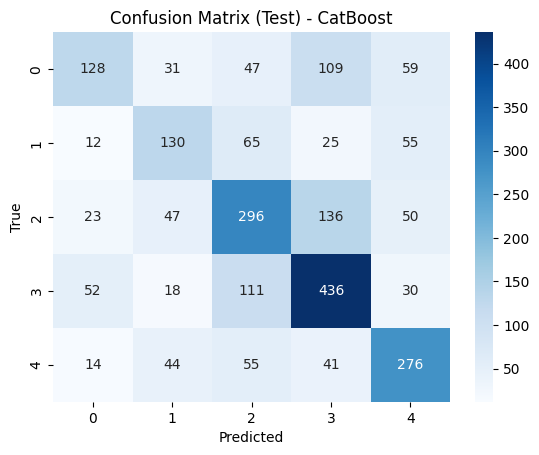


Training Logistic Regression...
Training time for Logistic Regression: 0.37 seconds

Classification Report for Logistic Regression (Train Set):
              precision    recall  f1-score   support

           0       0.57      0.21      0.31      1412
           1       0.53      0.42      0.47      1203
           2       0.46      0.53      0.49      2148
           3       0.54      0.69      0.60      2662
           4       0.57      0.58      0.57      1732

    accuracy                           0.52      9157
   macro avg       0.53      0.49      0.49      9157
weighted avg       0.53      0.52      0.51      9157


Classification Report for Logistic Regression (Test Set):
              precision    recall  f1-score   support

           0       0.48      0.16      0.24       374
           1       0.50      0.40      0.44       287
           2       0.49      0.55      0.52       552
           3       0.54      0.71      0.62       647
           4       0.58      0.63   

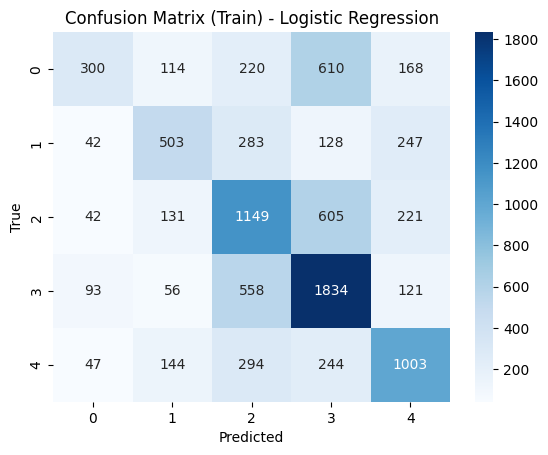

Confusion Matrix for Logistic Regression (Test Set):


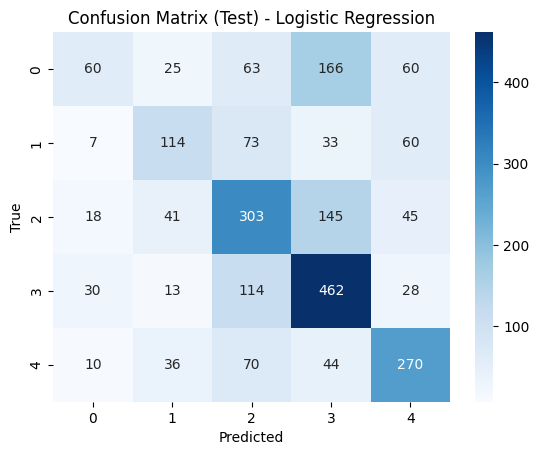


Training Ridge Classifier...
Training time for Ridge Classifier: 0.04 seconds

Classification Report for Ridge Classifier (Train Set):
              precision    recall  f1-score   support

           0       0.63      0.14      0.23      1412
           1       0.58      0.38      0.46      1203
           2       0.45      0.47      0.46      2148
           3       0.50      0.76      0.60      2662
           4       0.56      0.58      0.57      1732

    accuracy                           0.51      9157
   macro avg       0.54      0.46      0.46      9157
weighted avg       0.53      0.51      0.49      9157


Classification Report for Ridge Classifier (Test Set):
              precision    recall  f1-score   support

           0       0.59      0.10      0.18       374
           1       0.54      0.36      0.43       287
           2       0.46      0.47      0.47       552
           3       0.50      0.77      0.61       647
           4       0.58      0.65      0.61     

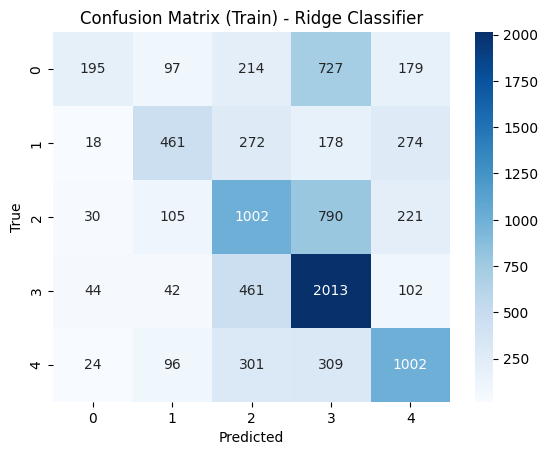

Confusion Matrix for Ridge Classifier (Test Set):


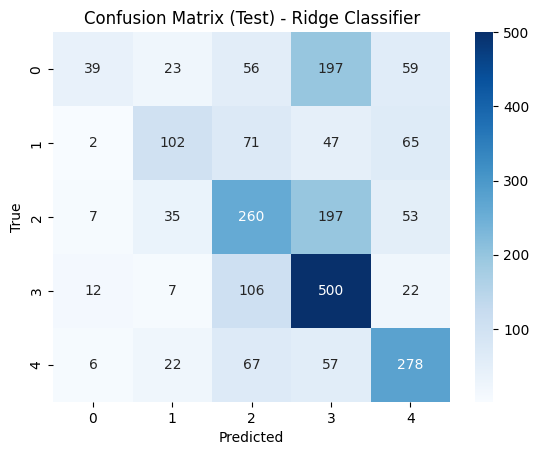


Training Perceptron...
Training time for Perceptron: 0.13 seconds

Classification Report for Perceptron (Train Set):
              precision    recall  f1-score   support

           0       0.30      0.45      0.36      1412
           1       0.39      0.36      0.37      1203
           2       0.37      0.29      0.32      2148
           3       0.44      0.39      0.41      2662
           4       0.47      0.51      0.49      1732

    accuracy                           0.39      9157
   macro avg       0.39      0.40      0.39      9157
weighted avg       0.40      0.39      0.39      9157


Classification Report for Perceptron (Test Set):
              precision    recall  f1-score   support

           0       0.29      0.43      0.34       374
           1       0.38      0.35      0.36       287
           2       0.34      0.25      0.29       552
           3       0.42      0.39      0.40       647
           4       0.48      0.52      0.50       430

    accuracy     

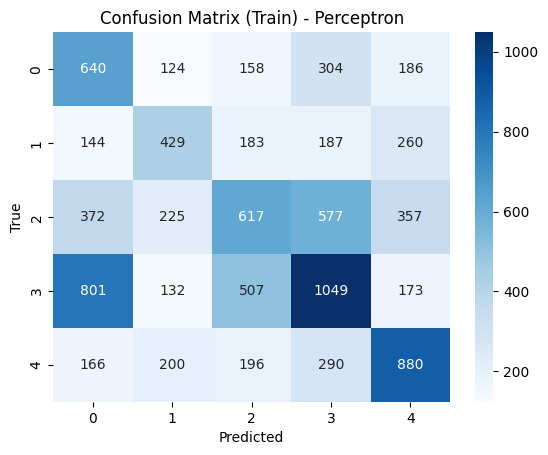

Confusion Matrix for Perceptron (Test Set):


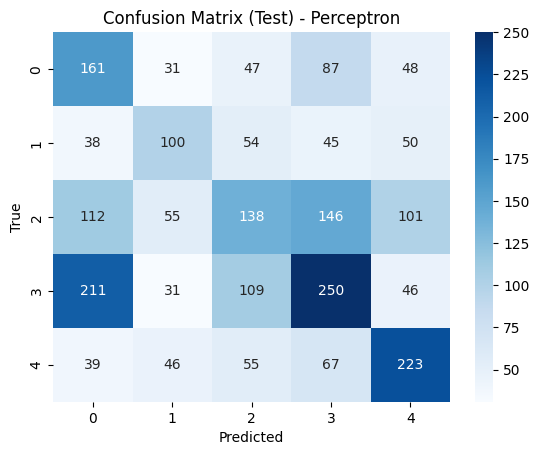


Training K-Nearest Neighbors...
Training time for K-Nearest Neighbors: 0.01 seconds

Classification Report for K-Nearest Neighbors (Train Set):
              precision    recall  f1-score   support

           0       0.55      0.52      0.54      1412
           1       0.58      0.55      0.57      1203
           2       0.58      0.64      0.61      2148
           3       0.65      0.69      0.67      2662
           4       0.70      0.59      0.64      1732

    accuracy                           0.62      9157
   macro avg       0.61      0.60      0.60      9157
weighted avg       0.62      0.62      0.62      9157


Classification Report for K-Nearest Neighbors (Test Set):
              precision    recall  f1-score   support

           0       0.36      0.31      0.33       374
           1       0.41      0.42      0.42       287
           2       0.37      0.40      0.38       552
           3       0.49      0.53      0.51       647
           4       0.55      0.50   

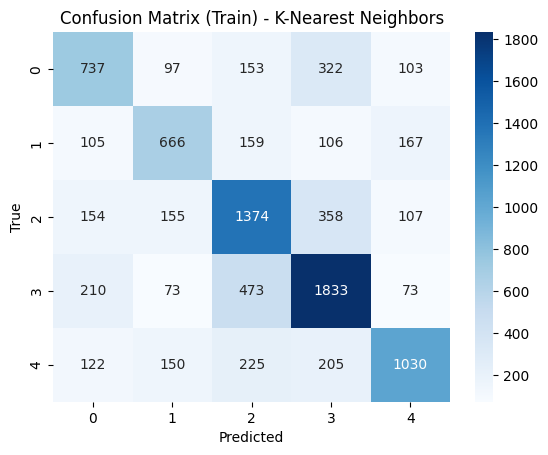

Confusion Matrix for K-Nearest Neighbors (Test Set):


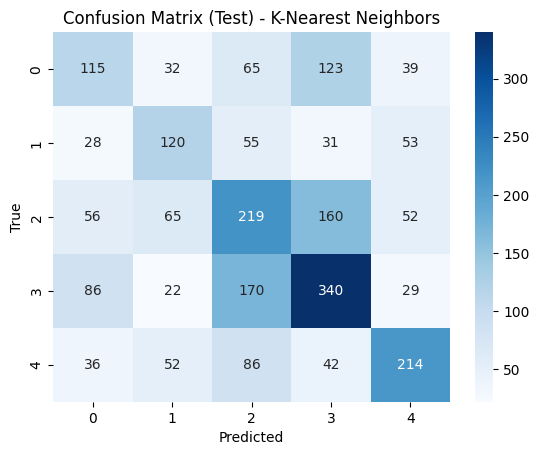


Training Voting Classifier...
Training time for Voting Classifier: 18.55 seconds

Classification Report for Voting Classifier (Train Set):
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1412
           1       1.00      1.00      1.00      1203
           2       1.00      1.00      1.00      2148
           3       1.00      1.00      1.00      2662
           4       1.00      1.00      1.00      1732

    accuracy                           1.00      9157
   macro avg       1.00      1.00      1.00      9157
weighted avg       1.00      1.00      1.00      9157


Classification Report for Voting Classifier (Test Set):
              precision    recall  f1-score   support

           0       0.51      0.29      0.37       374
           1       0.51      0.44      0.47       287
           2       0.50      0.55      0.52       552
           3       0.57      0.67      0.61       647
           4       0.58      0.63      0.60

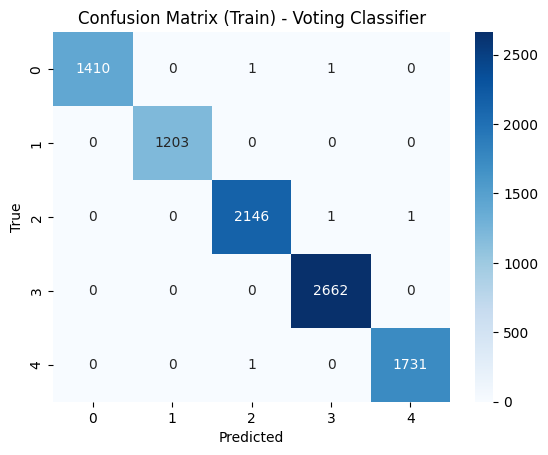

Confusion Matrix for Voting Classifier (Test Set):


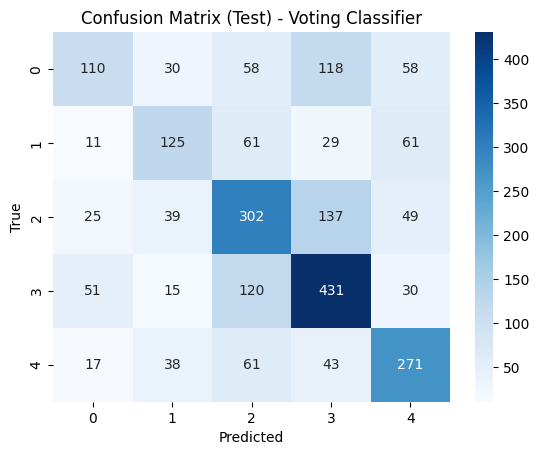


Training Bagging Classifier...
Training time for Bagging Classifier: 33.06 seconds

Classification Report for Bagging Classifier (Train Set):
              precision    recall  f1-score   support

           0       1.00      0.96      0.98      1412
           1       0.99      0.96      0.98      1203
           2       0.99      0.98      0.98      2148
           3       0.97      0.99      0.98      2662
           4       0.96      0.99      0.97      1732

    accuracy                           0.98      9157
   macro avg       0.98      0.98      0.98      9157
weighted avg       0.98      0.98      0.98      9157


Classification Report for Bagging Classifier (Test Set):
              precision    recall  f1-score   support

           0       0.63      0.23      0.33       374
           1       0.51      0.40      0.45       287
           2       0.49      0.57      0.53       552
           3       0.56      0.69      0.62       647
           4       0.55      0.63      

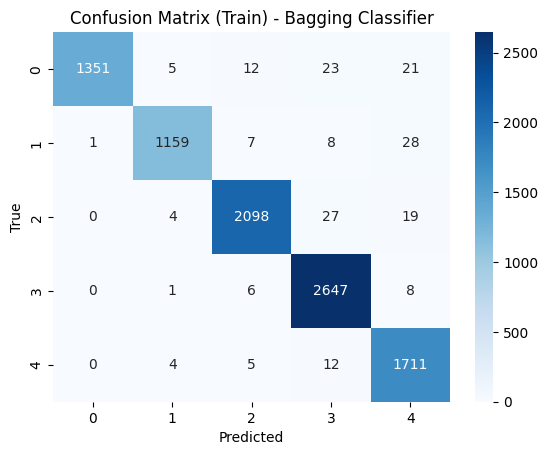

Confusion Matrix for Bagging Classifier (Test Set):


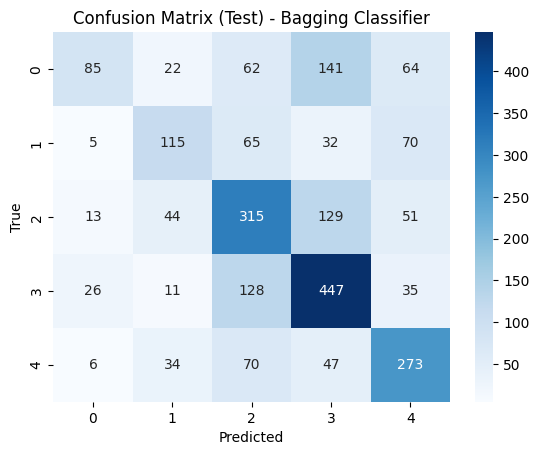


Training AdaBoost...


c:\Users\mayuo\OneDrive\Documents\Machine Learning by Abraham\interview_take_home\venv\lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


Training time for AdaBoost: 2.32 seconds

Classification Report for AdaBoost (Train Set):
              precision    recall  f1-score   support

           0       0.52      0.30      0.38      1412
           1       0.49      0.45      0.47      1203
           2       0.46      0.46      0.46      2148
           3       0.55      0.66      0.60      2662
           4       0.55      0.59      0.57      1732

    accuracy                           0.52      9157
   macro avg       0.51      0.49      0.50      9157
weighted avg       0.52      0.52      0.51      9157


Classification Report for AdaBoost (Test Set):
              precision    recall  f1-score   support

           0       0.51      0.28      0.36       374
           1       0.43      0.44      0.43       287
           2       0.46      0.44      0.45       552
           3       0.55      0.68      0.61       647
           4       0.54      0.59      0.57       430

    accuracy                           0.51    

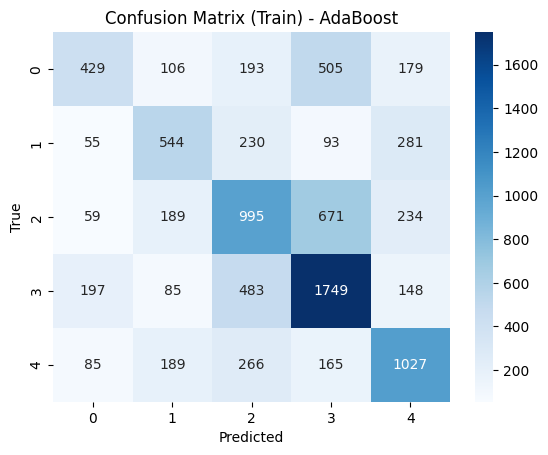

Confusion Matrix for AdaBoost (Test Set):


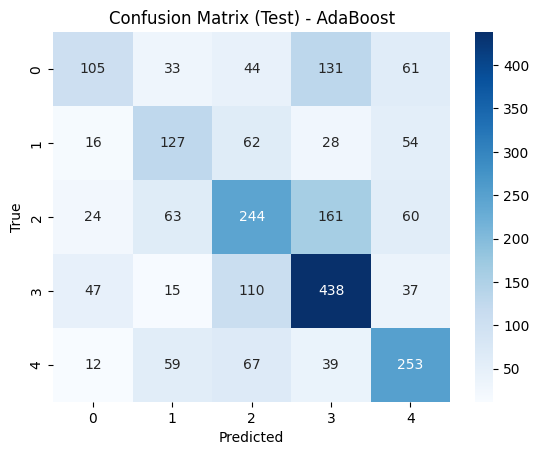


Training Gradient Boosting (Robust)...


InvalidParameterError: The 'loss' parameter of GradientBoostingClassifier must be a str among {'log_loss', 'exponential'}. Got 'lad' instead.

In [28]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=67)
encoder = LabelEncoder()
y_train_encoded = encoder.fit_transform(y_train)
y_test_encoded = encoder.transform(y_test)
train_and_evaluate_models(X_train, y_train_encoded, X_test, y_test_encoded, encoder)

In [29]:
model = RandomForestClassifier()  # Example model
model.fit(X_train, y_train)  # Train the model (or use your trained model)

# Call SHAP analysis
shap_analysis(model, X_train, original_X, scaler=None)

TypeError: Cannot cast array data from dtype('O') to dtype('float64') according to the rule 'safe'